In [21]:
import pandas as pd
import ratio as r

In [22]:
all_coins_df = pd.read_csv('all_coins.csv', index_col='Time')
all_coins_df.rename({'XRP Price': 'XRP', 'Solana Price': 'Solana', 'Tron Price': 'Tron', 'PolyMath Price': 'PolyMath', 'Fantom Price': 'Fantom'
                               , 'Ethereum Price': 'Ethereum', 'Cronos Price': 'Cronos', 'Binance Price': 'Binance'}, axis = 1, inplace=True)
all_coins_df

,XRP,Solana,Tron,PolyMath,Fantom,Ethereum,Cronos,Binance
Time,,,,,,,,
2020-04-11,0.188586,0.784711,0.012500,0.018466,0.003309,158.327878,0.050024,13.826759
2020-04-12,0.187934,0.875994,0.012708,0.018751,0.003374,158.863826,0.050062,14.265117
2020-04-13,0.188272,0.786712,0.012576,0.018010,0.003414,156.701359,0.049767,15.045573
2020-04-14,0.186109,0.666673,0.012420,0.018902,0.003211,158.267151,0.050093,15.582721
2020-04-15,0.181698,0.637621,0.012179,0.018189,0.002994,153.222864,0.048174,14.585949
...,...,...,...,...,...,...,...,...
2022-04-05,0.818752,126.605680,0.069441,0.485305,1.454651,3422.969884,0.471989,446.692828
2022-04-06,0.762166,112.529026,0.063205,0.426554,1.303942,3171.371104,0.440632,420.521418
2022-04-07,0.788300,118.688395,0.064453,0.443645,1.350759,3232.834989,0.448653,437.092422


In [23]:
# create a balanced crypto ETF that is the mean of all coins

all_coins_df['Balanced ETF'] = all_coins_df.mean(axis = 1)
all_coins_df

,XRP,Solana,Tron,PolyMath,Fantom,Ethereum,Cronos,Binance,Balanced ETF
Time,,,,,,,,,
2020-04-11,0.188586,0.784711,0.012500,0.018466,0.003309,158.327878,0.050024,13.826759,21.651529
2020-04-12,0.187934,0.875994,0.012708,0.018751,0.003374,158.863826,0.050062,14.265117,21.784721
2020-04-13,0.188272,0.786712,0.012576,0.018010,0.003414,156.701359,0.049767,15.045573,21.600710
2020-04-14,0.186109,0.666673,0.012420,0.018902,0.003211,158.267151,0.050093,15.582721,21.848410
2020-04-15,0.181698,0.637621,0.012179,0.018189,0.002994,153.222864,0.048174,14.585949,21.088708
...,...,...,...,...,...,...,...,...,...
2022-04-05,0.818752,126.605680,0.069441,0.485305,1.454651,3422.969884,0.471989,446.692828,499.946066
2022-04-06,0.762166,112.529026,0.063205,0.426554,1.303942,3171.371104,0.440632,420.521418,463.427256
2022-04-07,0.788300,118.688395,0.064453,0.443645,1.350759,3232.834989,0.448653,437.092422,473.963952


<AxesSubplot:xlabel='Time'>

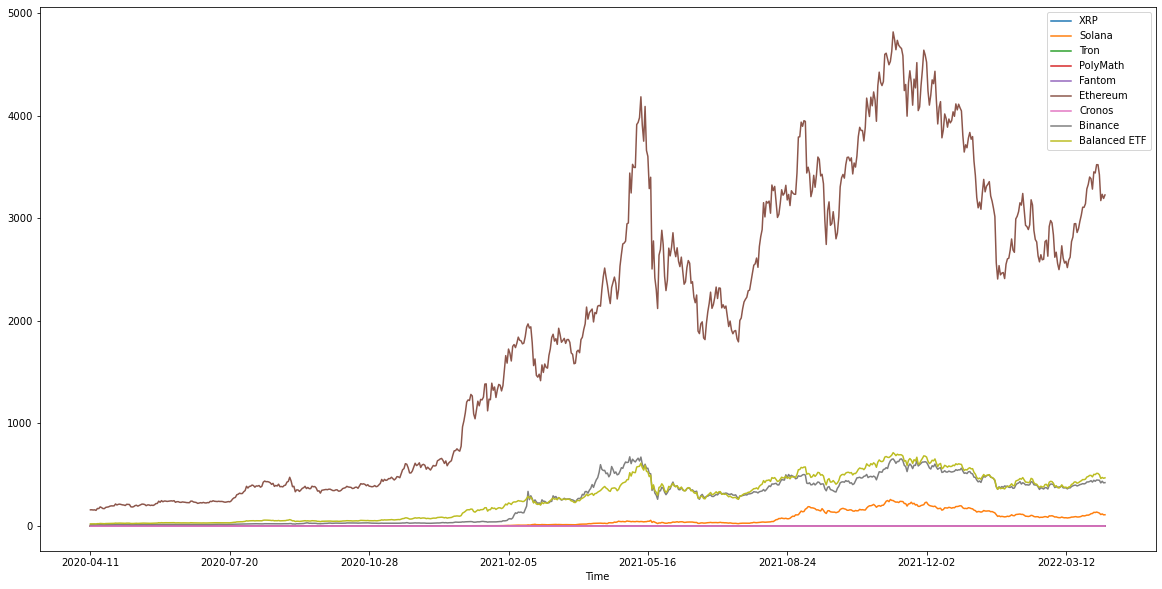

In [24]:
all_coins_df.plot(figsize = (20, 10))

In [25]:
risk = []
expected_return = []
token = []

for column in all_coins_df:
    token.append(all_coins_df[[column]].columns)
    coin_df = all_coins_df[[column, column]]
    sigma, exp_return = r.markowitz(coin_df)
    risk.append(sigma)
    expected_return.append(exp_return)

risk_df = pd.DataFrame(risk, columns = ['risk'])
exp_return_df = pd.DataFrame(expected_return, columns = ['expected_return'])
token_df = pd.DataFrame(token, columns = ['coin'])

comb_df = pd.concat([risk_df, exp_return_df, token_df], axis = 1)
# comb_df['coin'] = comb_df['coin'].replace(['XRP Price', 'Solana Price', 'Tron Price', 'PolyMath Price', 'Fantom Price', 'Ethereum Price', 'Cronos Price', 'Binance Price']
#                                           ,['XRP', 'Solana', 'Tron', 'PolyMath', 'Fantom', 'Ethereum', 'Cronos', 'Binance'])

comb_df.set_index('coin', inplace=True)
comb_df


    

,risk,expected_return
coin,,
XRP,0.069221,1.012270
Solana,0.083462,10.873725
Tron,0.054925,1.236821
PolyMath,0.082045,3.812742
Fantom,0.104483,18.537073
Ethereum,0.048396,3.514322
Cronos,0.060364,1.957541
Binance,0.061563,4.533797
Balanced ETF,0.047815,3.661347


<AxesSubplot:xlabel='coin'>

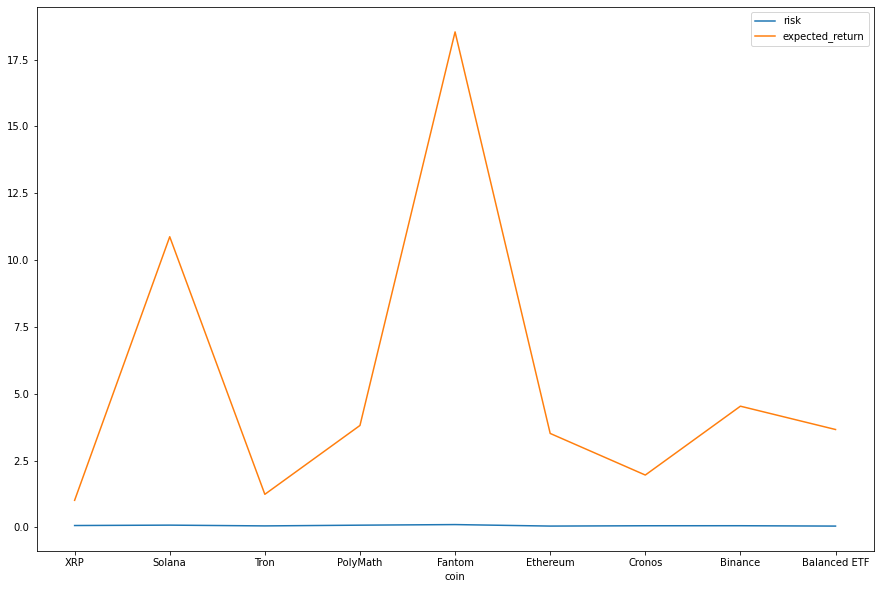

In [26]:
comb_df.plot(figsize = (15, 10))